In [10]:
import requests
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

import ipywidgets as widgets
from ipywidgets import interact, interact_manual


In [13]:
def show_country(country, log=False):
    result = requests.get(f'https://corona.lmao.ninja/v2/historical/{country}?lastdays=300')
    data = result.json()
    timeline = data['timeline']
    cases_data = timeline['cases']
    deaths_data = timeline['deaths']
    recovered_data = timeline['recovered']
    dates = list(cases_data.keys())
    
    from datetime import datetime

    datetimes = [datetime.strptime(d, '%m/%d/%y') for d in dates]
    
    # for d in dates: 
    #     dt = datetime.strptime(d, '%m/%d/%y')
    #     print(f'date: {d} {dt}')

    cases = [cases_data[date] for date in dates]
    deaths = [deaths_data[date] for date in dates]
    recovered = [recovered_data[date] for date in dates]

    ill = np.array(cases) - (np.array(deaths) + np.array(recovered))

    # print(f'cases: {cases[-1]} deaths: {deaths[-1]} recovered: {recovered[-1]} ill: {ill[-1]}')

    #     cases = np.log(cases)
    #     deaths = np.log(deaths)
    #     recovered = np.log(recovered)
    #     ill = np.log(ill)

    mode = 'LOG' if log else ''
    plt.title(f"COVID 19 ({country})  {cases[-1]} / {deaths[-1]} / {recovered[-1]} {mode}")
    plt.plot(datetimes, cases, label='cases', color='blue')
    plt.plot(datetimes, deaths, label='deaths', color='red')
    plt.plot(datetimes, recovered, label='recovered', color='green')
    plt.plot(datetimes, ill, label='ill', color='magenta')
    plt.legend()
    if log:
        plt.yscale("log")
    plt.show()
    # print(f'cases: {cases}')
    # print(f'deaths: {deaths}')
    # print(f'recovered: {recovered}')


cases: 18328 deaths: 148 recovered: 1470 ill: 16710


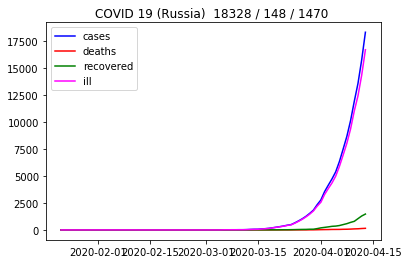

cases: 159516 deaths: 20465 recovered: 35435 ill: 103616


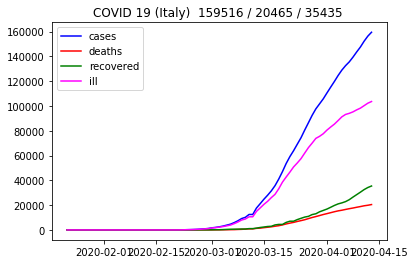

cases: 170099 deaths: 17756 recovered: 64727 ill: 87616


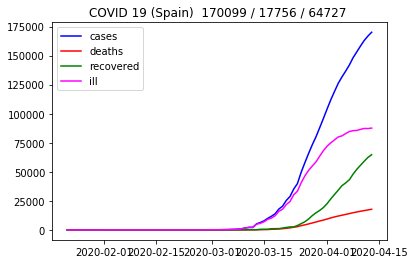

cases: 580619 deaths: 23529 recovered: 43482 ill: 513608


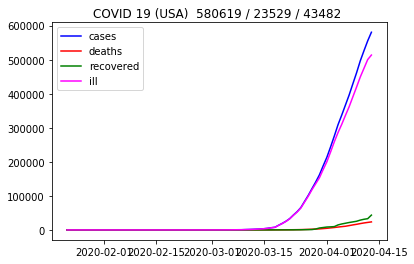

cases: 11586 deaths: 116 recovered: 1855 ill: 9615


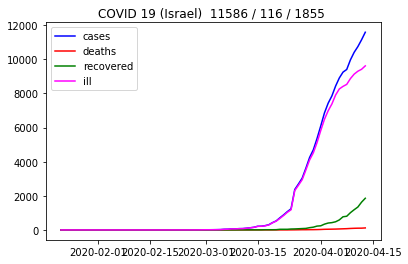

cases: 18328 deaths: 148 recovered: 1470 ill: 16710


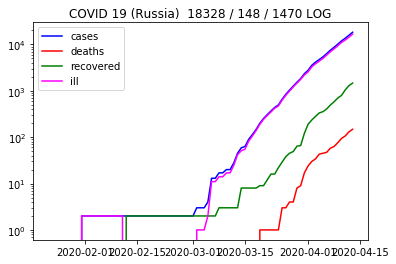

cases: 159516 deaths: 20465 recovered: 35435 ill: 103616


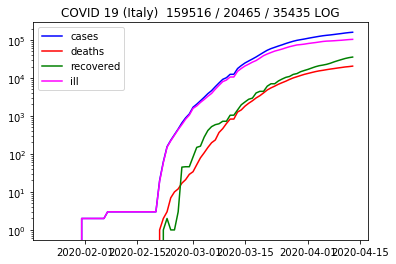

cases: 170099 deaths: 17756 recovered: 64727 ill: 87616


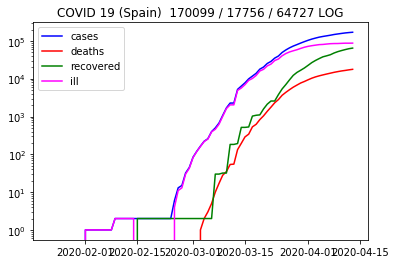

cases: 580619 deaths: 23529 recovered: 43482 ill: 513608


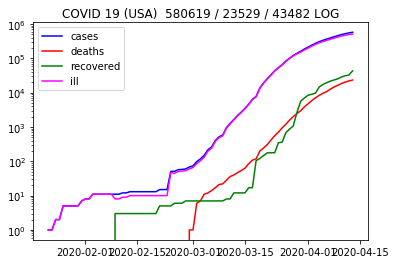

cases: 11586 deaths: 116 recovered: 1855 ill: 9615


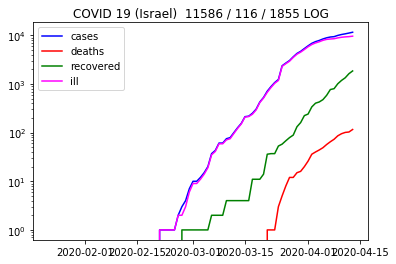

In [15]:


show_country('Russia')
show_country('Italy')
show_country('Spain')
show_country('USA')
show_country('Israel')

show_country('Russia', log=True)
show_country('Italy', log=True)
show_country('Spain', log=True)
show_country('USA', log=True)
show_country('Israel', log=True)

# show_country('South Africa')
